In [1]:
# To handle datasets
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import defaultdict

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


# For the yeo-johnson transformation
import scipy.stats as stats

# To display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
train_set = pd.read_csv('./train_set_new.csv')

In [3]:
train_set.drop(columns='index', inplace = True)

In [4]:
train_set.head()

,price_value,amenities,Kraj pochodzenia,Oferta od,Typ,Stan,Engine capacity,No accident,Mileage,Door count,Fuel type,Nr of seats,Gearbox,Transmission,Engine power,Color,Damaged,Region,Company,Price,Lacquer,Age,Norm Engine capacity,Norm Mileage,Norm Engine power,Norm Age,Norm amenities
0,63900,38,Polska,Firmy,Kompakt,Używane,1199,Tak,200,5,Benzyna,5.0,Manualna,Na przednie koła,110,Czarny,Nie,warminsko-mazurskie,Citroën,11.065075,Metallic,6,7.089243,200,4.700480,1.791759,38
1,41900,24,Polska,Firmy,SUV,Używane,1598,Nie,118808,5,Benzyna,5.0,Automatyczna bezstopniowa (CVT),Missing,117,Czarny,Nie,mazowieckie,Nissan,10.643041,Missing,11,7.376508,118808,4.762174,2.397895,24
2,17950,28,Niemcy,Firmy,Coupe,Używane,1364,Tak,106000,3,Benzyna,5.0,Manualna,Na przednie koła,90,Czarny,Nie,wielkopolskie,Opel,9.795345,Metallic,15,7.218177,106000,4.499810,2.708050,28
3,38000,35,Niemcy,Osoby prywatnej,Sedan,Używane,1798,Nie,172758,5,Benzyna,5.0,Manualna,Na przednie koła,160,Czarny,Nie,opolskie,Audi,10.545341,Pearl,15,7.494430,172758,5.075174,2.708050,35
4,21900,23,Niemcy,Osoby prywatnej,Auta miejskie,Używane,1250,Tak,97128,5,Benzyna,5.0,Manualna,Na przednie koła,82,Bordowy,Nie,opolskie,Ford,9.994242,Metallic,13,7.130899,97128,4.406719,2.564949,23


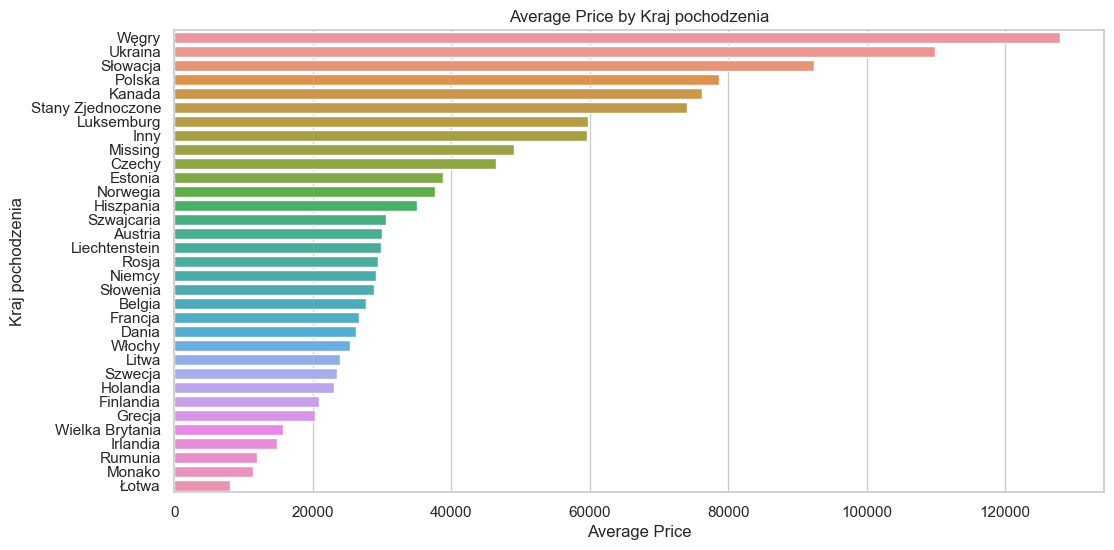

In [5]:
country_price_relation = train_set.groupby('Kraj pochodzenia')['price_value'].mean().reset_index()

# Sort by average price in descending order
country_price_relation = country_price_relation.sort_values(by='price_value', ascending=False)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.barplot(x='price_value', y='Kraj pochodzenia', data=country_price_relation)
plt.title('Average Price by Kraj pochodzenia')
plt.xlabel('Average Price')
plt.ylabel('Kraj pochodzenia')
plt.show()

In [6]:
train_set.drop(columns = 'Kraj pochodzenia', inplace = True)

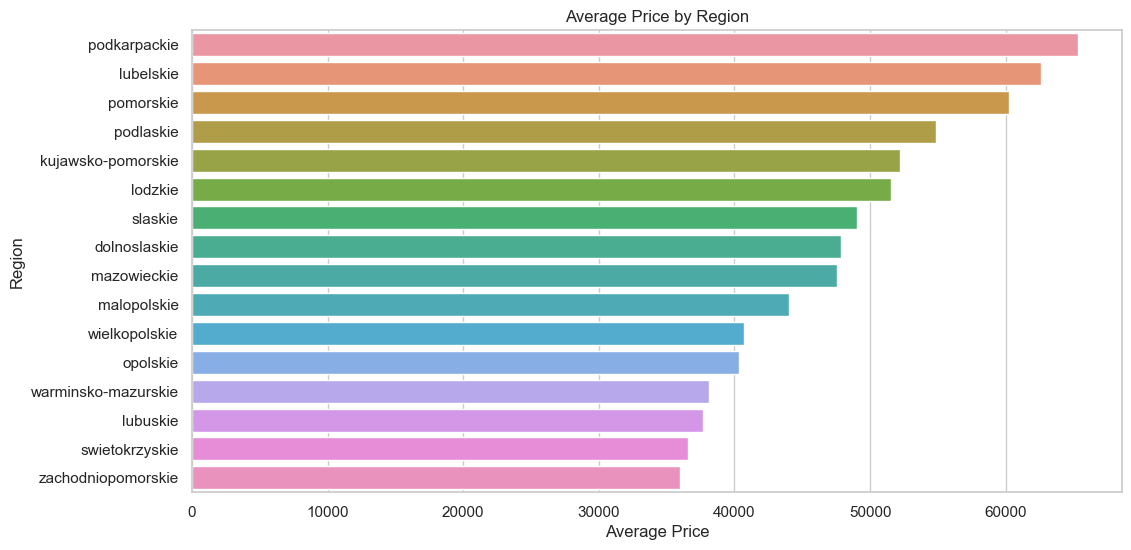

In [7]:
region_price_relation = train_set.groupby('Region')['price_value'].mean().reset_index()

# Sort by average price in descending order
region_price_relation = region_price_relation.sort_values(by='price_value', ascending=False)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.barplot(x='price_value', y='Region', data=region_price_relation)
plt.title('Average Price by Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

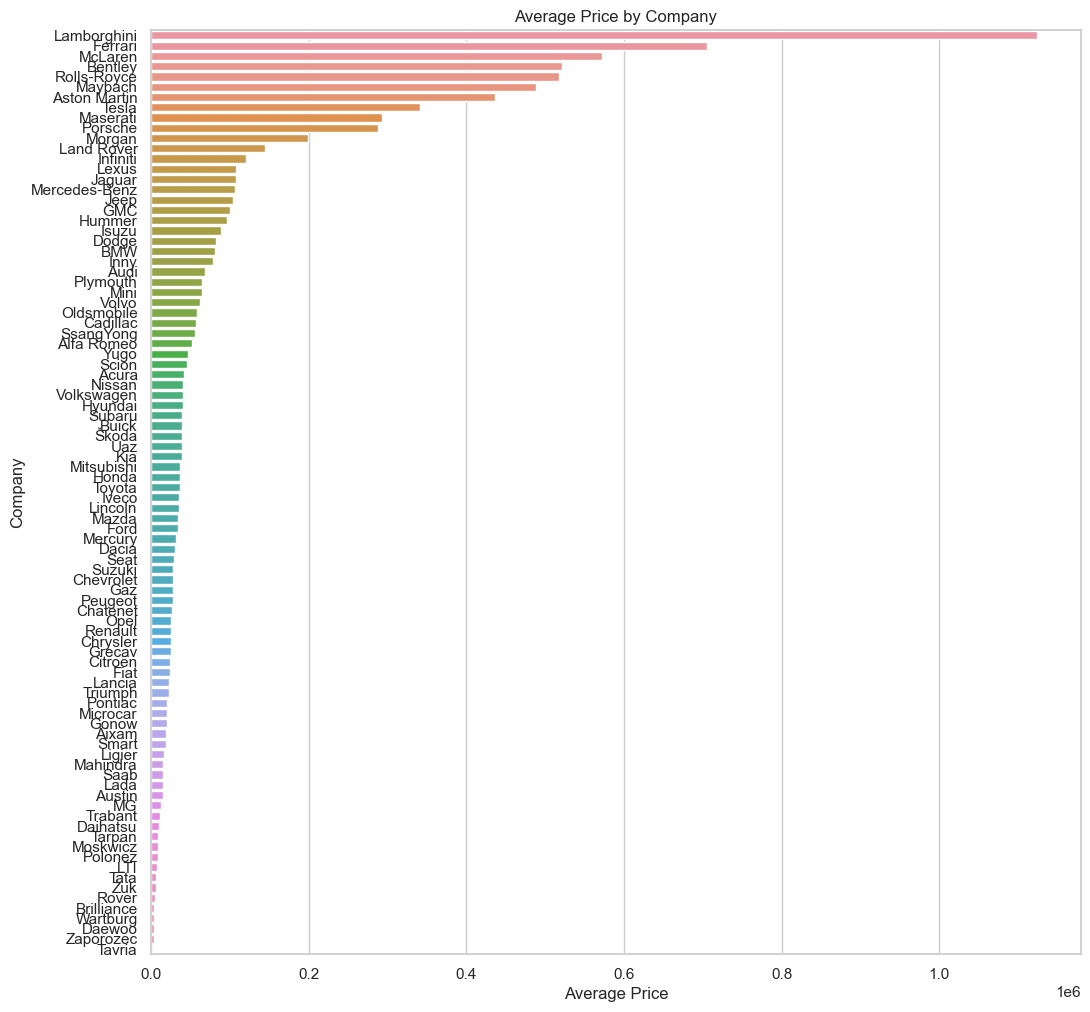

In [8]:
company_price_relation = train_set.groupby('Company')['price_value'].mean().reset_index()

# Sort by average price in descending order
company_price_relation = company_price_relation.sort_values(by='price_value', ascending=False)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(12, 12))
sns.barplot(x='price_value', y='Company', data=company_price_relation)
plt.title('Average Price by Company')
plt.xlabel('Average Price')
plt.ylabel('Company')
plt.show()

In [9]:
col_cat_name_binary = ['Oferta od', 'Stan', 'No accident', 'Damaged']

In [10]:
col_cat_name_multi = ['Typ', 'Door count', 'Nr of seats', 'Gearbox', 'Transmission', 'Color', 'Lacquer', 'Fuel type']

In [11]:
print(len(col_cat_name_binary))

4


In [12]:
print(len(col_cat_name_multi))

8


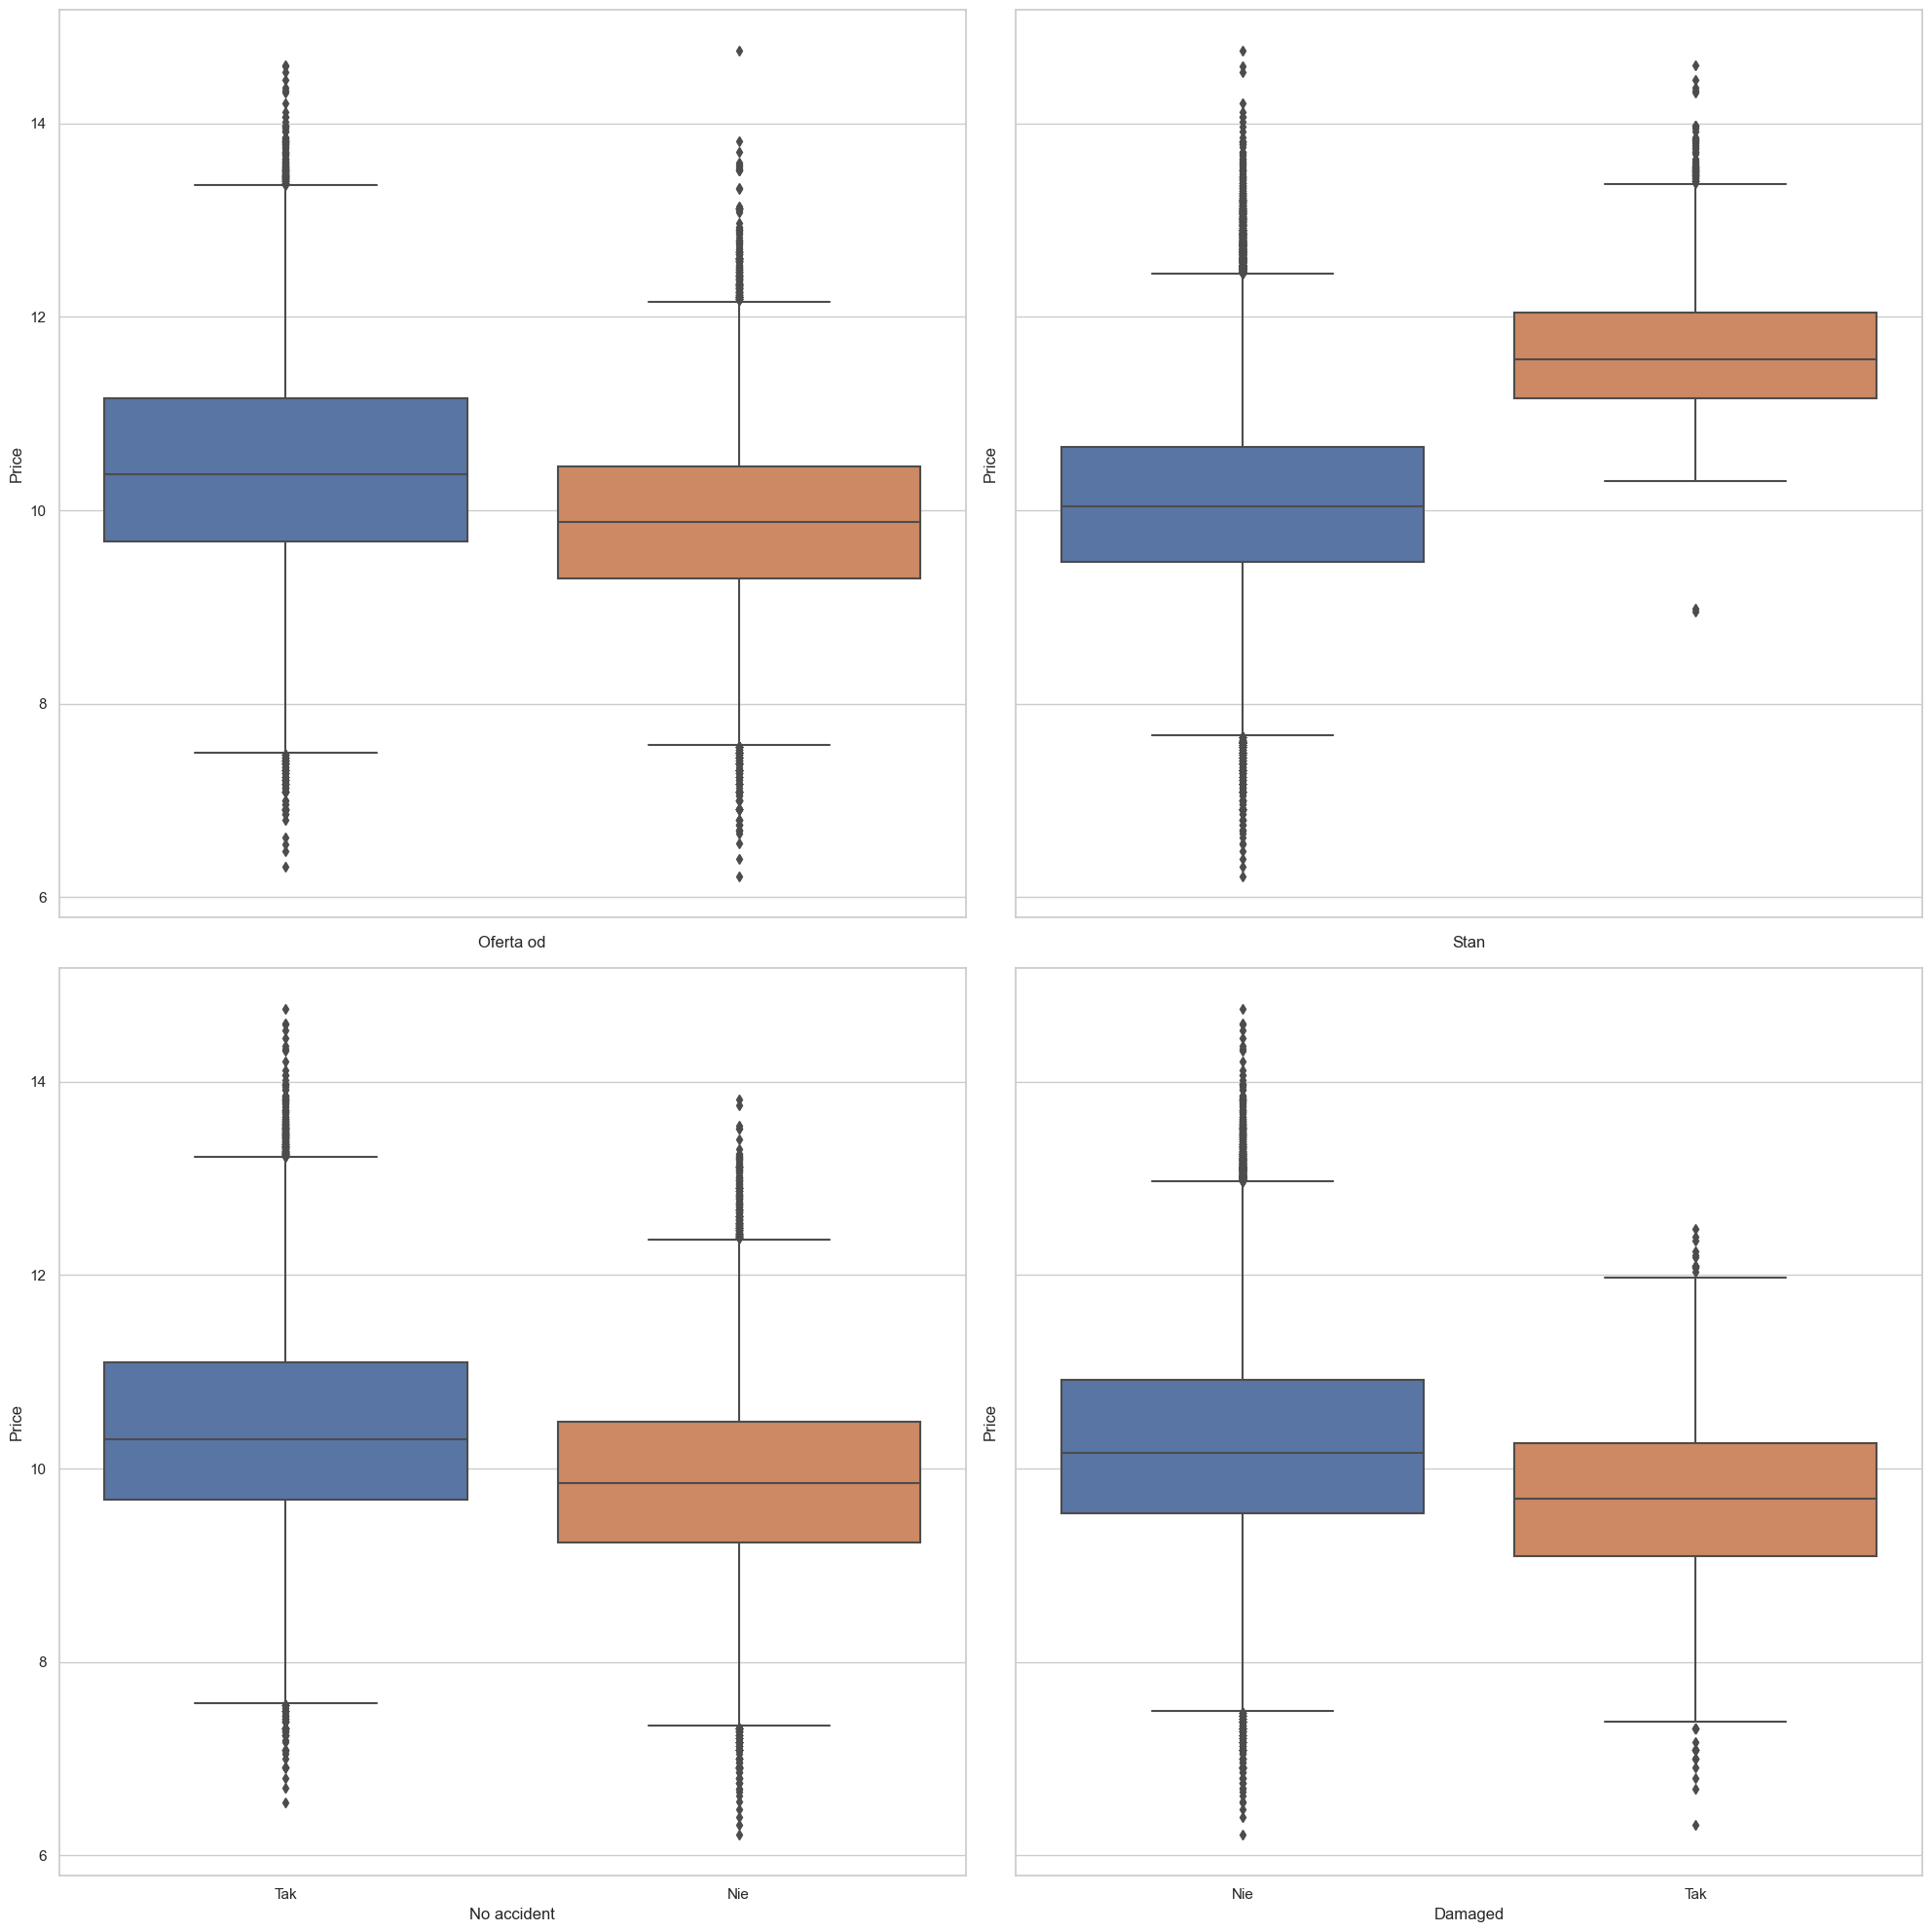

In [13]:
# Create a figure and axes
i = 2
j = 2

fig, axes = plt.subplots(i, j, figsize=(20, 20))
num_plots = i * j

# Iterate over the enumerated data and axes, and plot the boxplots
for idx, d in enumerate(col_cat_name_binary):
    ax = axes[idx // j, idx % j]
    sns.boxplot(x = d, y = 'Price', data = train_set, ax = ax)

    # Remove x-axis labels for all but the bottom row
    if idx // j != i - 1:
        ax.set_xticklabels([])

    # Remove y-axis labels for all but the leftmost column
    if idx % j != 0:
        ax.set_yticklabels([])

# Remove extra subplots if the number of plots is less than the number of subplots
if len(col_cat_name_binary) < num_plots:
    for ax in axes.flatten()[len(col_cat_name_binary):]:
        ax.remove()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

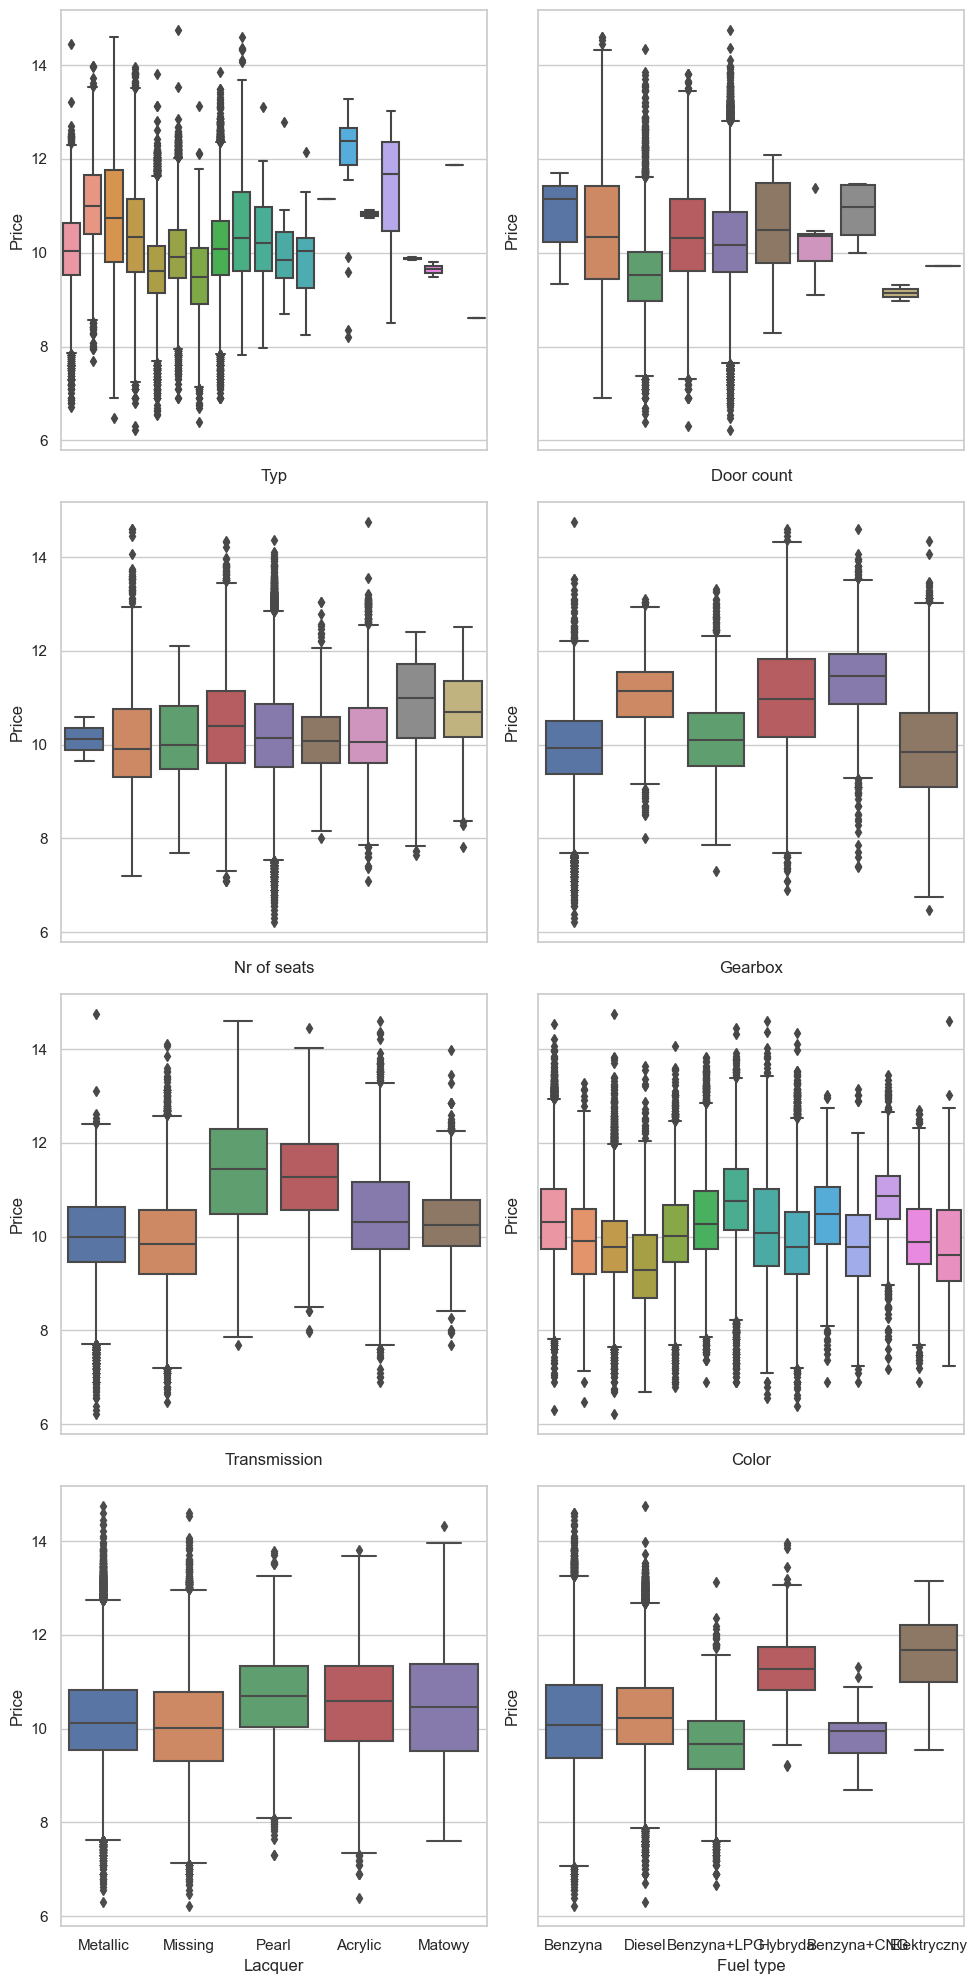

In [14]:
# Create a figure and axes
i = 4
j = 2

fig, axes = plt.subplots(i, j, figsize=(10, 20))
num_plots = i * j

# Iterate over the enumerated data and axes, and plot the boxplots
for idx, d in enumerate(col_cat_name_multi):
    ax = axes[idx // j, idx % j]
    sns.boxplot(x = d, y = 'Price', data = train_set, ax = ax)

    # Remove x-axis labels for all but the bottom row
    if idx // j != i - 1:
        ax.set_xticklabels([])

    # Remove y-axis labels for all but the leftmost column
    if idx % j != 0:
        ax.set_yticklabels([])

# Remove extra subplots if the number of plots is less than the number of subplots
if len(col_cat_name_multi) < num_plots:
    for ax in axes.flatten()[len(col_cat_name_multi):]:
        ax.remove()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

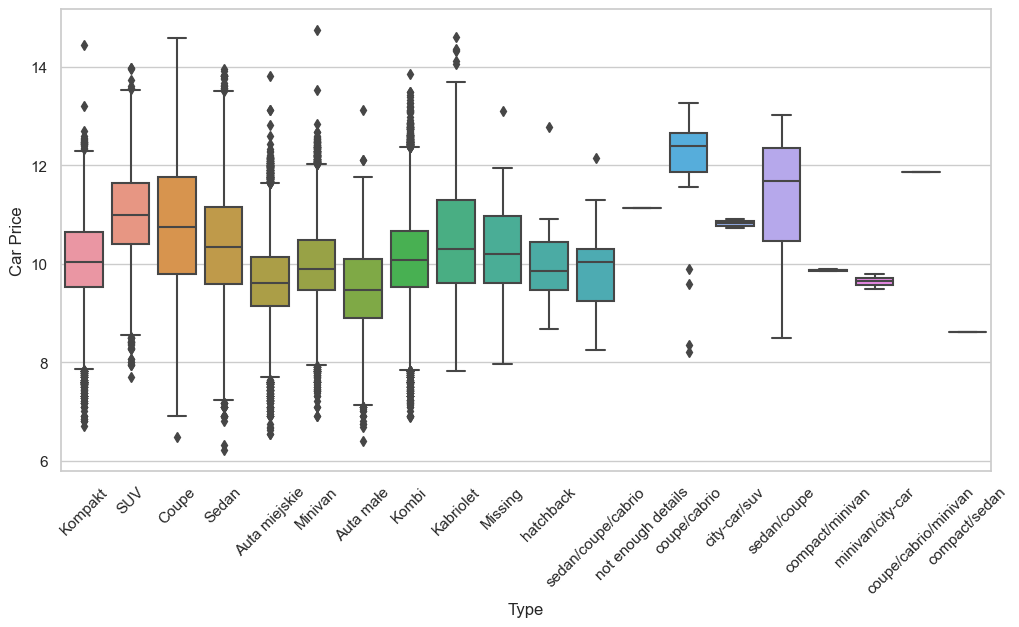

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Typ', y='Price')
plt.xlabel('Type')
plt.ylabel('Car Price')
#plt.title('Car Price vs. Car Body Type')
plt.xticks(rotation=45)
plt.show()

In [16]:
value_mapping = {'Kompakt': 'Kompakt/Hatchback',
                 'SUV': 'SUV',
                 'Coupe': 'Coupe',
                 'Sedan': 'Sedan',
                 'Auta miejskie': 'Auta miejskie/małe',
                 'Minivan': 'Minivan/Kombi',
                 'Auta małe': 'Auta miejskie/małe',
                 'Kombi': 'Minivan/Kombi',
                 'Kabriolet': 'Kabriolet',
                 'Missing': 'Missing',
                 'hatchback': 'Kompakt/Hatchback',
                 'sedan/coupe/cabrio': 'Sedan',
                 'not enough details': 'Missing',
                 'coupe/cabrio': 'Coupe',
                 'city-car/suv': 'SUV',
                 'sedan/coupe': 'Coupe',
                 'compact/minivan': 'Minivan/Kombi',
                 'minivan/city-car': 'Auta miejskie/małe',
                 'coupe/cabrio/minivan': 'Coupe',
                 'compact/sedan': 'Kompakt/Hatchback'}

In [17]:
train_set['Typ'] = train_set['Typ'].replace(value_mapping)

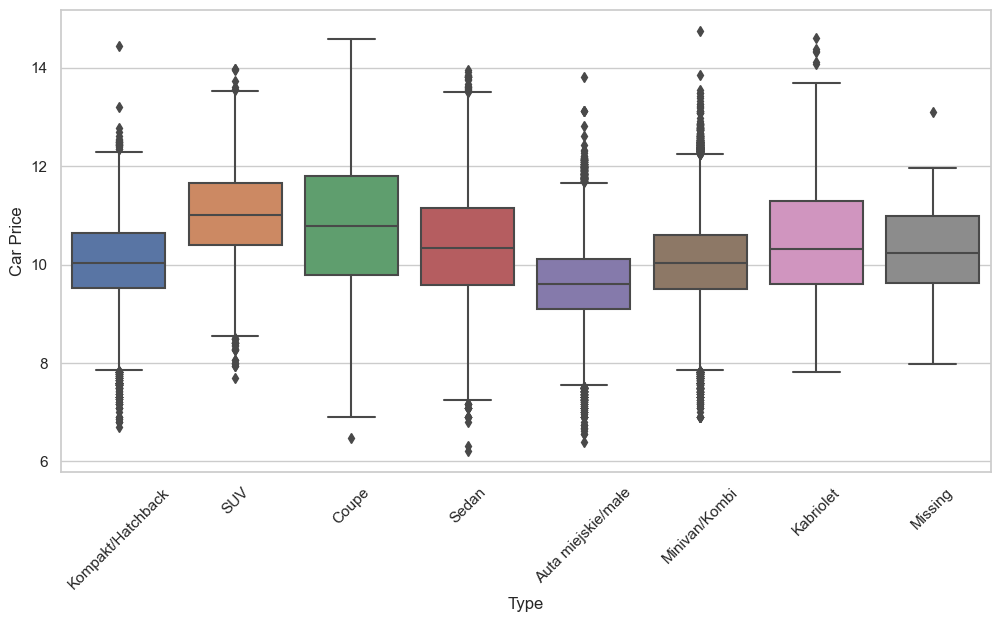

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Typ', y='Price')
plt.xlabel('Type')
plt.ylabel('Car Price')
#plt.title('Car Price vs. Car Body Type')
plt.xticks(rotation=45)
plt.show()

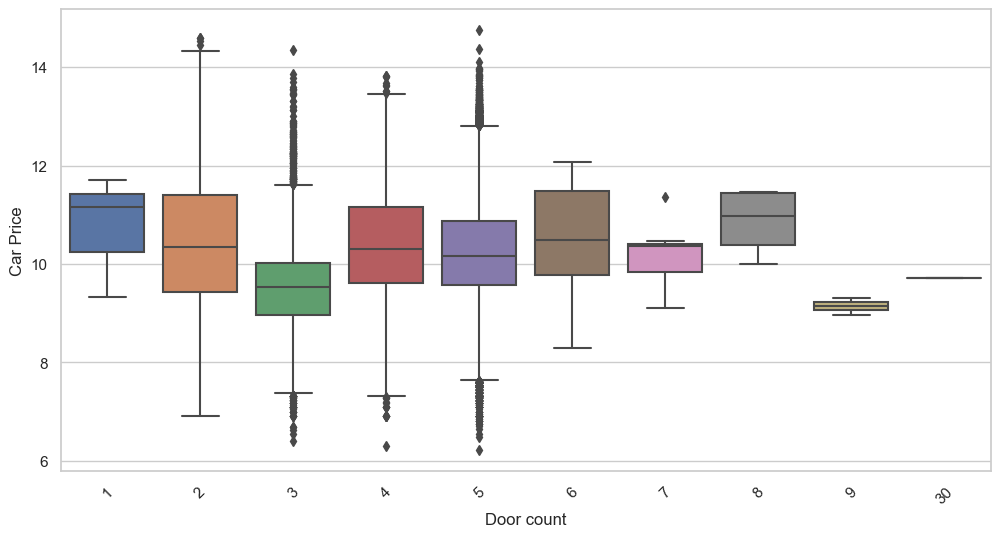

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Door count', y='Price')
plt.xlabel('Door count')
plt.ylabel('Car Price')
#plt.title('Car Price vs. Car Body Type')
plt.xticks(rotation=45)
plt.show()

In [20]:
train_set['Door count'].replace({1.0: 5.0, 2.0: 5.0, 4.0: 5.0, 6.0: 5.0, 7.0: 5.0, 8.0: 5.0, 9.0: 5.0, 30.0: 5.0}, inplace=True)

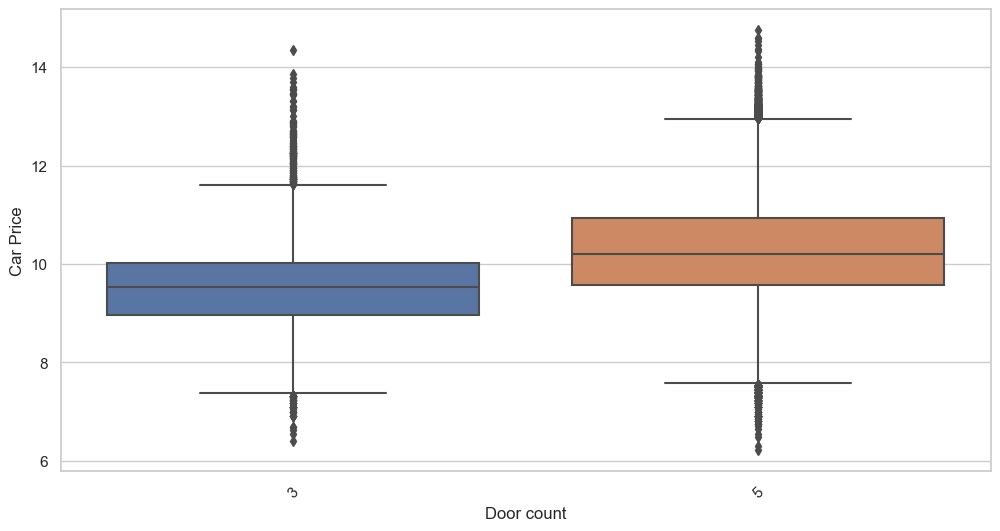

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Door count', y='Price')
plt.xlabel('Door count')
plt.ylabel('Car Price')
#plt.title('Car Price vs. Car Body Type')
plt.xticks(rotation=45)
plt.show()

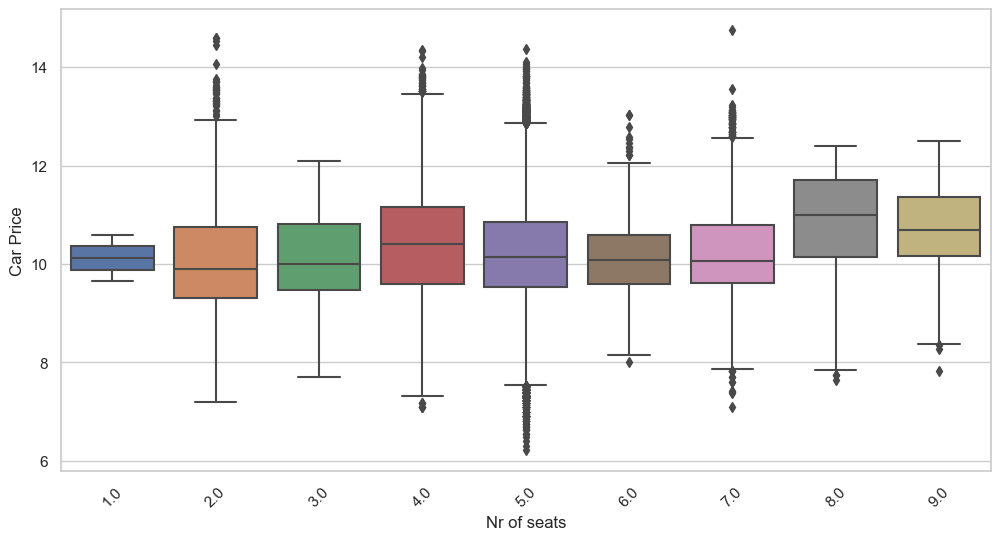

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Nr of seats', y='Price')
plt.xlabel('Nr of seats')
plt.ylabel('Car Price')
#plt.title('Car Price vs. Car Body Type')
plt.xticks(rotation=45)
plt.show()

In [23]:
train_set.drop(columns = 'Nr of seats', inplace = True)

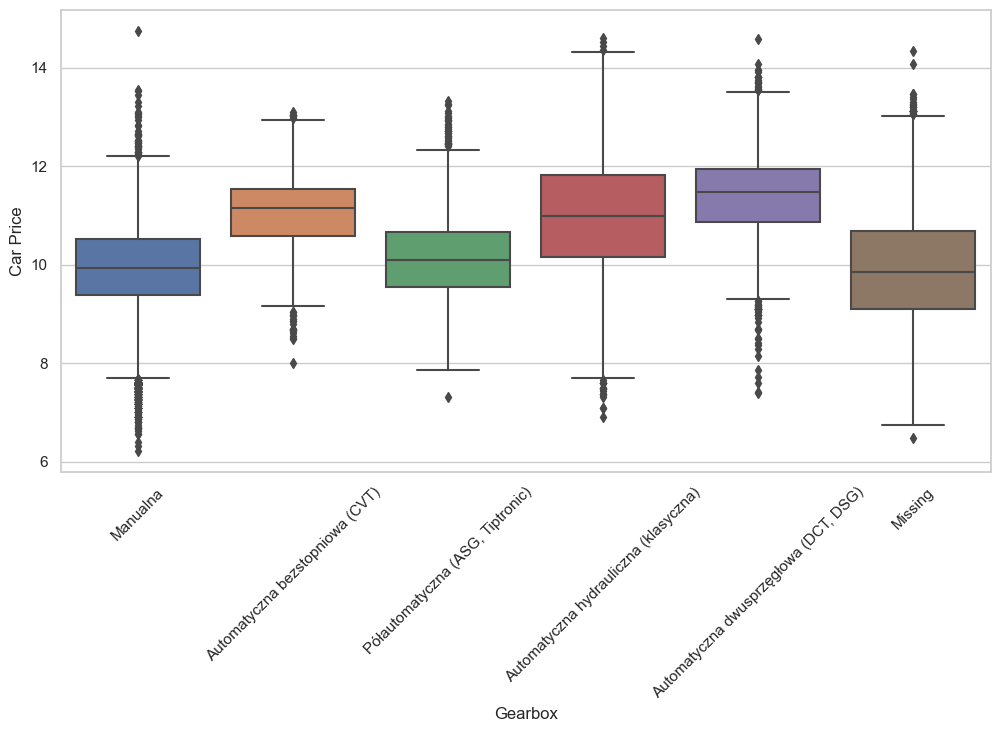

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Gearbox', y='Price')
plt.xlabel('Gearbox')
plt.ylabel('Car Price')
#plt.title('Car Price vs. Car Body Type')
plt.xticks(rotation=45)
plt.show()

In [25]:
value_mapping = {'Manualna': 'Manualna/Półautomatyczna',
                 'Automatyczna bezstopniowa (CVT)': 'Automatyczna',
                 'Półautomatyczna (ASG, Tiptronic)': 'Manualna/Półautomatyczna',
                 'Automatyczna hydrauliczna (klasyczna)': 'Automatyczna',
                 'Automatyczna dwusprzęgłowa (DCT, DSG)': 'Automatyczna',
                 'Missing': 'Manualna/Półautomatyczna'
                }

In [26]:
train_set['Gearbox'] = train_set['Gearbox'].replace(value_mapping)

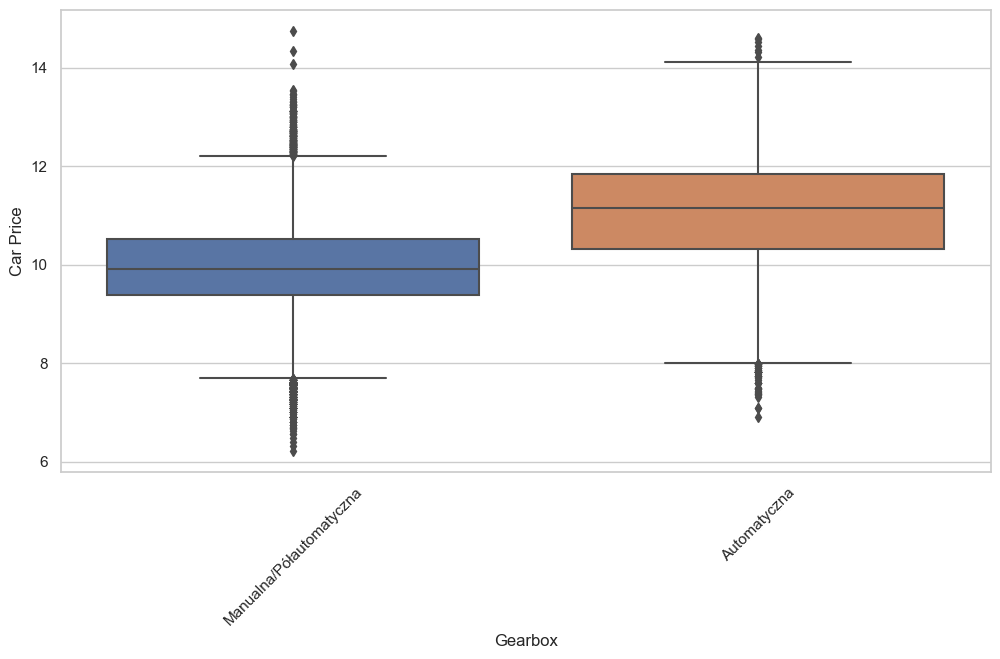

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Gearbox', y='Price')
plt.xlabel('Gearbox')
plt.ylabel('Car Price')
#plt.title('Car Price vs. Car Body Type')
plt.xticks(rotation=45)
plt.show()

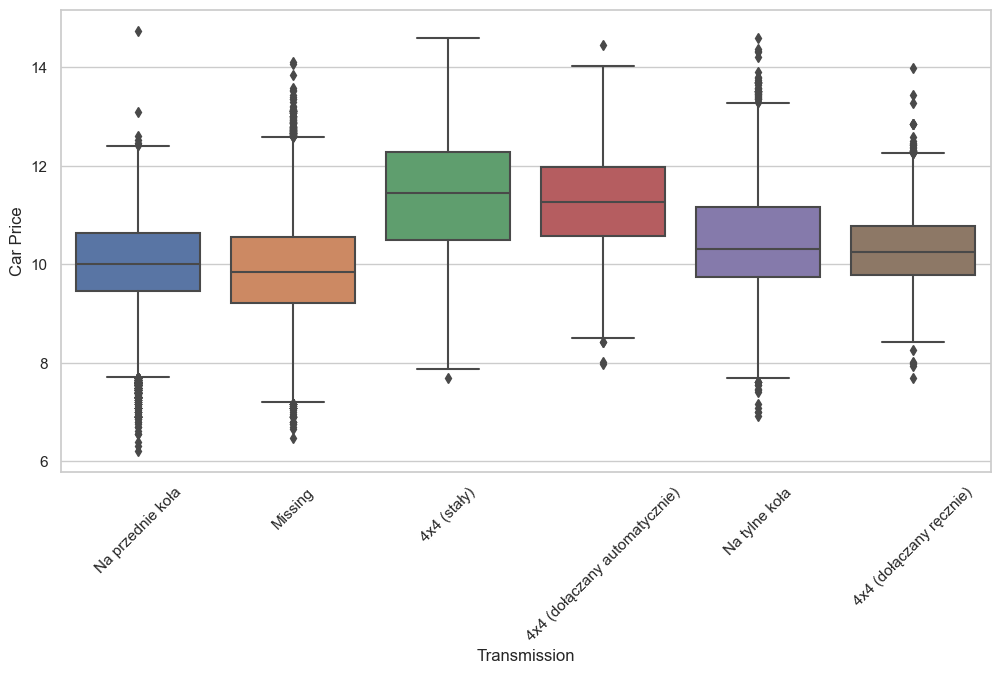

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Transmission', y='Price')
plt.xlabel('Transmission')
plt.ylabel('Car Price')
#plt.title('Car Price vs. Car Body Type')
plt.xticks(rotation=45)
plt.show()

In [29]:
value_mapping = {'Na przednie koła': 'Na przednie koła',
                 'Missing': 'Na przednie koła',
                 '4x4 (stały)': '4x4 stały/dołączany automatycznie',
                 '4x4 (dołączany automatycznie)': '4x4 stały/dołączany automatycznie',
                 'Na tylne koła': 'Na tylne koła/4x4 (dołączany ręcznie)',
                 '4x4 (dołączany ręcznie)': 'Na tylne koła/4x4 (dołączany ręcznie)'
                }

In [30]:
train_set['Transmission'] = train_set['Transmission'].replace(value_mapping)

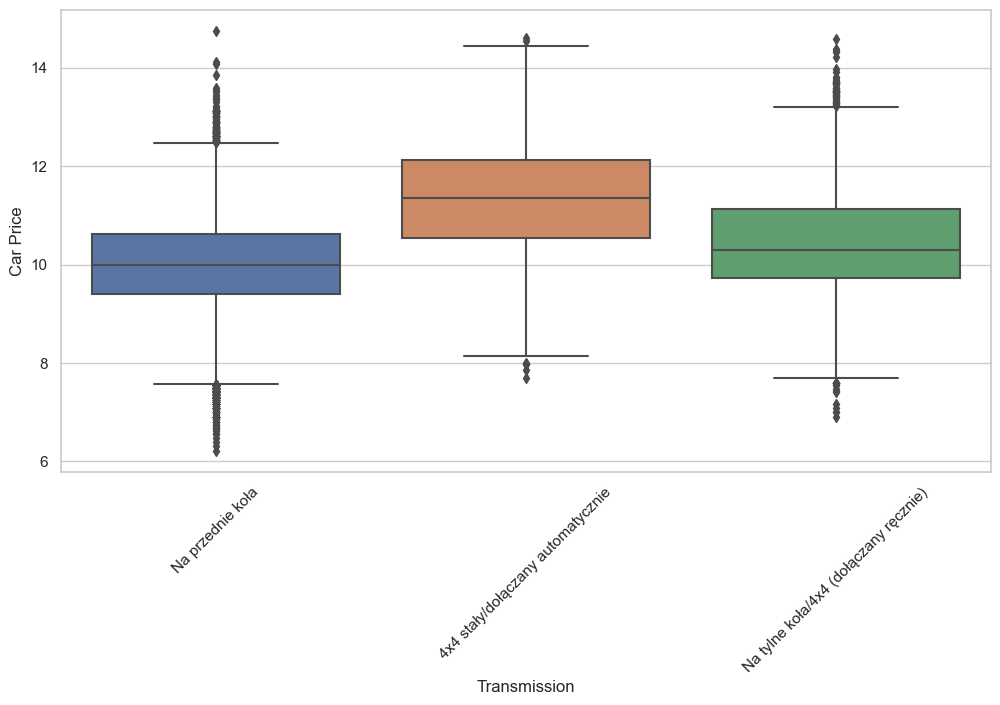

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Transmission', y='Price')
plt.xlabel('Transmission')
plt.ylabel('Car Price')
#plt.title('Car Price vs. Car Body Type')
plt.xticks(rotation=45)
plt.show()

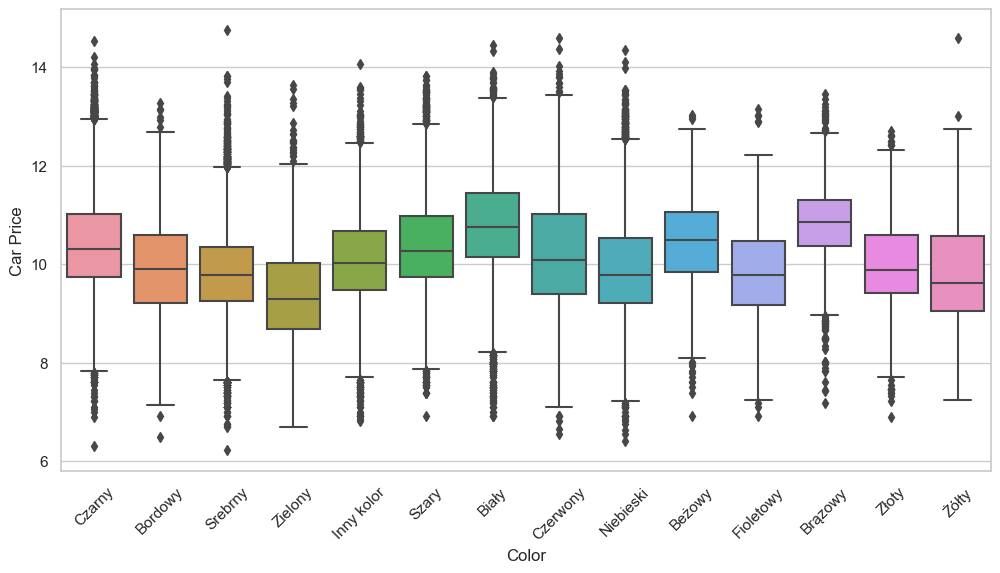

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Color', y='Price')
plt.xlabel('Color')
plt.ylabel('Car Price')
#plt.title('Car Price vs. Car Body Type')
plt.xticks(rotation=45)
plt.show()

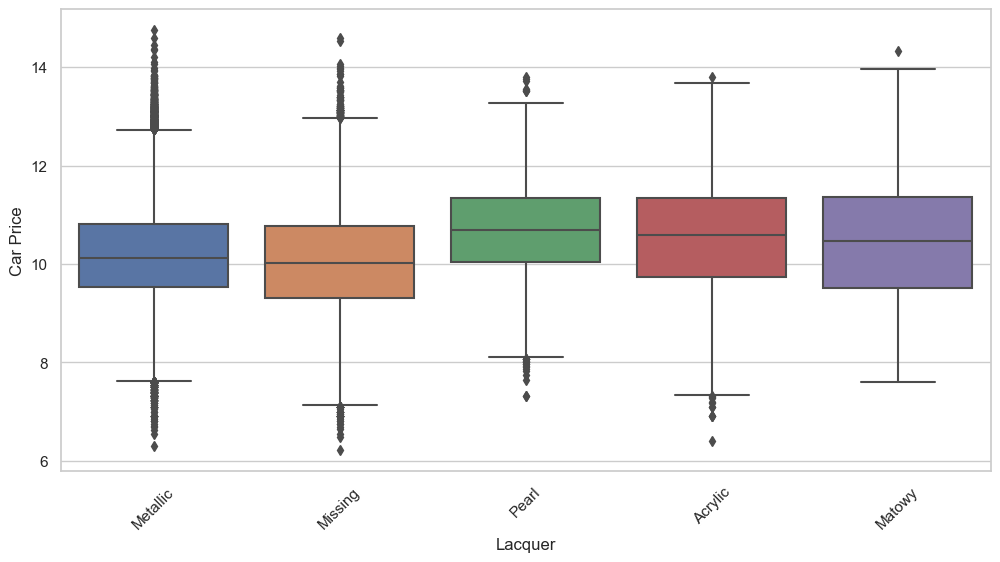

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Lacquer', y='Price')
plt.xlabel('Lacquer')
plt.ylabel('Car Price')
#plt.title('Car Price vs. Car Body Type')
plt.xticks(rotation=45)
plt.show()

In [34]:
value_mapping = {'Metallic': 'Metalik',
                 'Missing': 'Metalik',
                 'Pearl': 'Inny',
                 'Acrylic': 'Inny',
                 'Matowy': 'Inny'
                }

In [35]:
train_set['Lacquer'] = train_set['Lacquer'].replace(value_mapping)

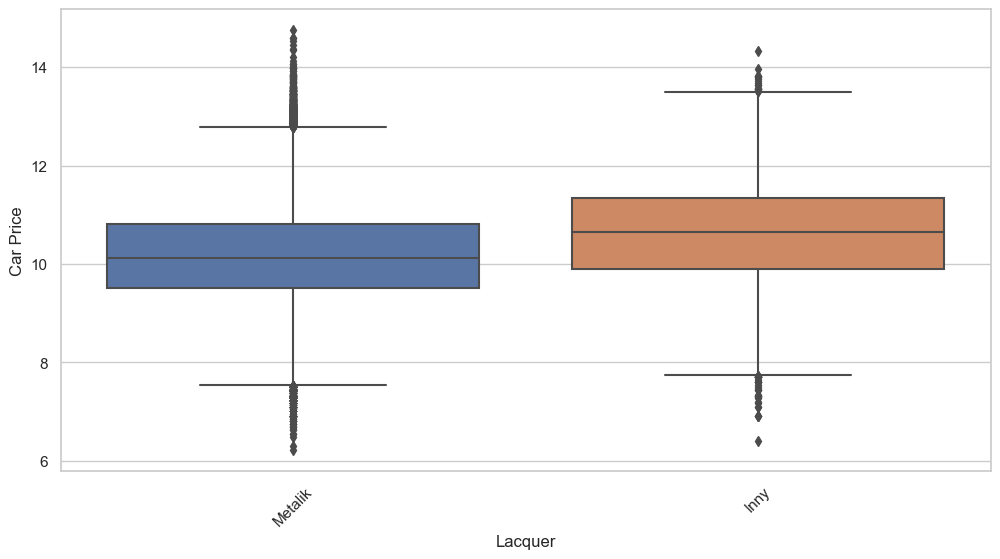

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_set, x='Lacquer', y='Price')
plt.xlabel('Lacquer')
plt.ylabel('Car Price')
#plt.title('Car Price vs. Car Body Type')
plt.xticks(rotation=45)
plt.show()

In [37]:
train_set.head()

,price_value,amenities,Oferta od,Typ,Stan,Engine capacity,No accident,Mileage,Door count,Fuel type,Gearbox,Transmission,Engine power,Color,Damaged,Region,Company,Price,Lacquer,Age,Norm Engine capacity,Norm Mileage,Norm Engine power,Norm Age,Norm amenities
0,63900,38,Firmy,Kompakt/Hatchback,Używane,1199,Tak,200,5,Benzyna,Manualna/Półautomatyczna,Na przednie koła,110,Czarny,Nie,warminsko-mazurskie,Citroën,11.065075,Metalik,6,7.089243,200,4.700480,1.791759,38
1,41900,24,Firmy,SUV,Używane,1598,Nie,118808,5,Benzyna,Automatyczna,Na przednie koła,117,Czarny,Nie,mazowieckie,Nissan,10.643041,Metalik,11,7.376508,118808,4.762174,2.397895,24
2,17950,28,Firmy,Coupe,Używane,1364,Tak,106000,3,Benzyna,Manualna/Półautomatyczna,Na przednie koła,90,Czarny,Nie,wielkopolskie,Opel,9.795345,Metalik,15,7.218177,106000,4.499810,2.708050,28
3,38000,35,Osoby prywatnej,Sedan,Używane,1798,Nie,172758,5,Benzyna,Manualna/Półautomatyczna,Na przednie koła,160,Czarny,Nie,opolskie,Audi,10.545341,Inny,15,7.494430,172758,5.075174,2.708050,35
4,21900,23,Osoby prywatnej,Auta miejskie/małe,Używane,1250,Tak,97128,5,Benzyna,Manualna/Półautomatyczna,Na przednie koła,82,Bordowy,Nie,opolskie,Ford,9.994242,Metalik,13,7.130899,97128,4.406719,2.564949,23


In [38]:
train_set.to_csv('./train_set_feature_engineering.csv', index=False)